In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns

In [4]:
df = pd.read_csv('insurance_data.csv')

In [5]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Column Types
- **Numerical** - Index, PatientID, age, bmi, bloodpressure, children, claim
- **Categorical** - gender, diabetic, smoker, region

## Univariate Analysis

### Age

In [6]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

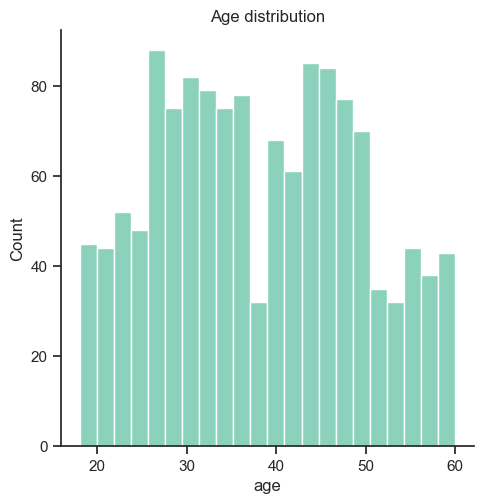

In [7]:
sns.set(style='ticks', palette='Set2')
sns.displot(data=df, x='age', kind='hist', bins=22).set(title='Age distribution')

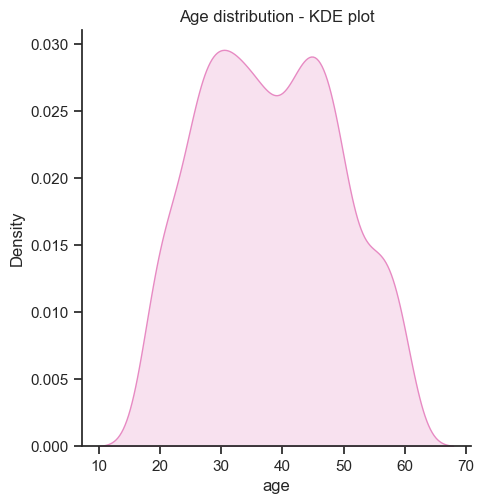

In [8]:
sns.displot(data=df,x='age',kind='kde', fill=True,color=sns.color_palette()[3]).set(title='Age distribution - KDE plot')

In [9]:
# calculating the skew

df['age'].skew()

0.11361133741072633

In [10]:
df['age'].isnull().sum()

5

**conclusions**
- Age is normally (almost) distributed
- Maximum number of people are aged between 25 - 50
- There are less number of people aged between 38 - 40 

### BMI

In [11]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [12]:
df['bmi'].isnull().sum()

0

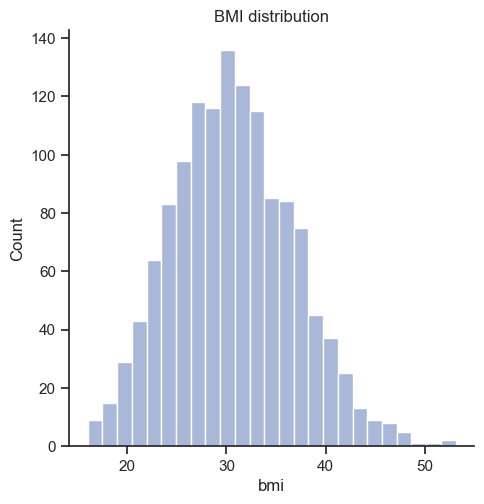

In [13]:
sns.displot(data=df, x='bmi', kind='hist', color=sns.color_palette()[2]).set(title='BMI distribution')

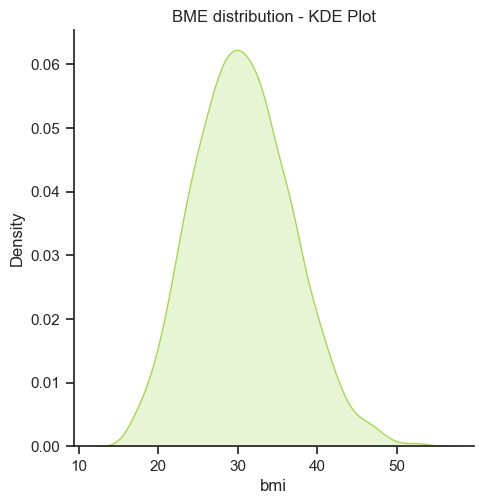

In [14]:
sns.displot(data=df, x='bmi', kind='kde', color=sns.color_palette()[4], fill=True).set(title='BME distribution - KDE Plot')

In [15]:
df['bmi'].skew()

0.28597245020808587

In [16]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

 If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range ([Source](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.))

- We can see from the study that general BMI range is from 18.5 to 24.9, but in our dataset, more than 50% of people have a BMI higher than 30 and the maximum is 53 which is extremely high
- Let's take a closer look at these points

In [17]:
df[df['bmi'] > 26]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


[Text(0.5, 1.0, 'BMI distribution -KDE + Rug Plot')]

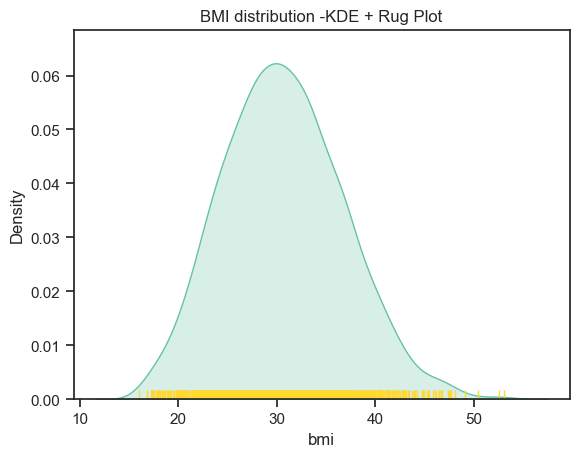

In [18]:
sns.kdeplot(data=df, x='bmi', fill=True)
sns.rugplot(data=df, x='bmi', color=sns.color_palette()[5]).set(title='BMI distribution -KDE + Rug Plot')

[Text(0.5, 1.0, 'BMI distribution - Box Plot')]

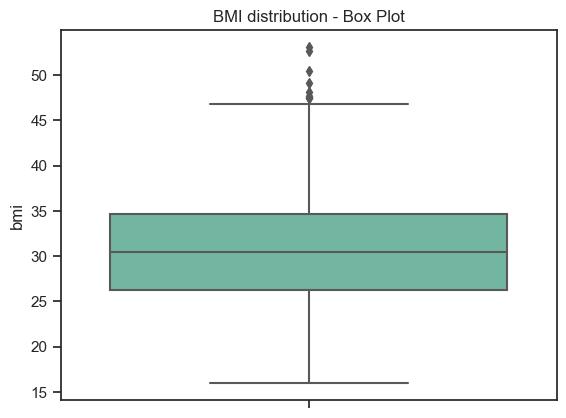

In [19]:
sns.boxplot(data=df, y='bmi').set(title='BMI distribution - Box Plot')

The boxplot says the median value is at 30 and the data has outliers over the value of 47 (around). This still seems really high and we will not this in our obervations

**conclusions**
- The BMI is normally distributed
- The BMI has very high values, values reaching over 45
- Median iss at 30, which is considered as obese 
- no missing values

### Bloodpressure

In [20]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

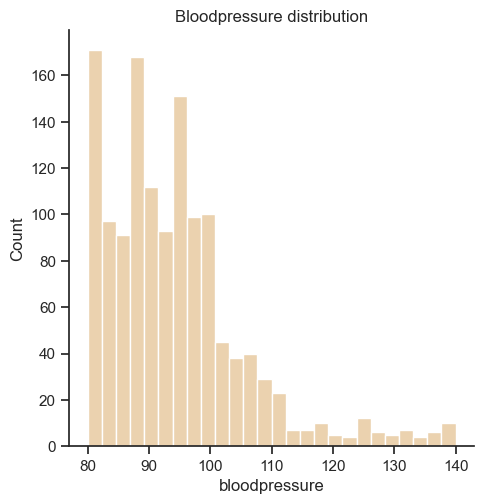

In [21]:
sns.displot(data=df, x='bloodpressure', kind='hist', color=sns.color_palette()[6]).set(title='Bloodpressure distribution')

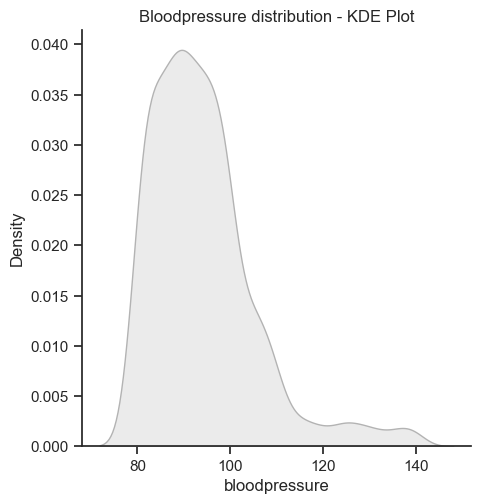

In [22]:
sns.displot(data=df, x='bloodpressure', kind='kde', color=sns.color_palette()[7], fill=True).set(title='Bloodpressure distribution - KDE Plot')

In [23]:
df['bloodpressure'].skew()

1.4835342102293079

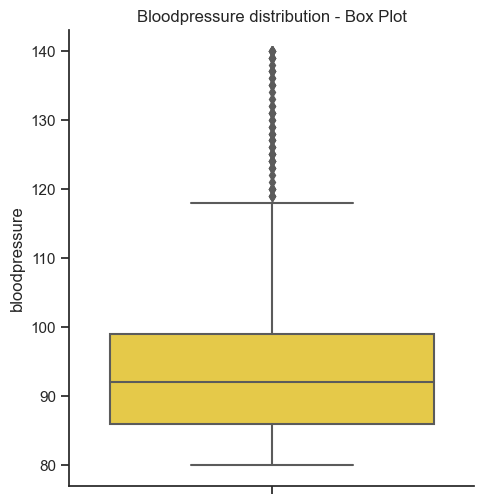

In [24]:
sns.catplot(data=df, y='bloodpressure', kind='box', color=sns.color_palette()[5]).set(title='Bloodpressure distribution - Box Plot')

There seem to lots of ouliers in the data according to the boxplot, lets check it out 

In [25]:
df[df['bloodpressure'] > 120]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
1156,1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1166,1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33
1169,1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92
1174,1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36


In [26]:
pd.crosstab(df[df['bloodpressure'] > 120]['smoker'], df[df['bloodpressure'] > 120]['bloodpressure'], margins=True).style.background_gradient(cmap='autumn_r')

bloodpressure,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,All
smoker,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,0,0,1,0,2,0,1,0,1,0,0,1,0,1,0,0,1,9
Yes,1,0,3,5,4,2,3,1,3,1,4,1,1,1,2,2,3,1,4,4,46
All,1,1,3,5,4,3,3,3,3,2,4,2,1,1,3,2,4,1,4,5,55


In [27]:
pd.crosstab(df[df['bloodpressure'] > 120]['diabetic'], df[df['bloodpressure'] > 120]['bloodpressure'], margins=True).style.background_gradient(cmap='autumn_r')

bloodpressure,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,All
diabetic,,,,,,,,,,,,,,,,,,,,,
No,1,0,2,2,2,2,2,2,0,2,1,2,0,0,2,1,2,0,3,1,27
Yes,0,1,1,3,2,1,1,1,3,0,3,0,1,1,1,1,2,1,1,4,28
All,1,1,3,5,4,3,3,3,3,2,4,2,1,1,3,2,4,1,4,5,55


As we can see that the people who have high BP are smokers or are diabetic and both of these affect the blood pressure; So I really dont think that these are outliers. They are just part of the data 

In [28]:
df['bloodpressure'].isnull().sum()

0

**conclusions**
- Right skewed 
- No missing values 
- No outliers (according to me)

### Claim

In [29]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

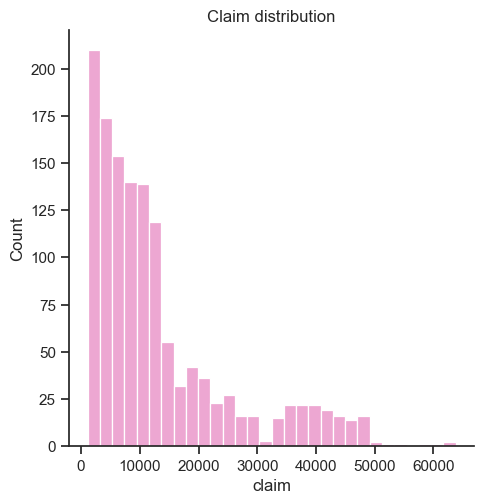

In [30]:
sns.displot(data=df, x='claim', kind='hist', color=sns.color_palette()[3]).set(title='Claim distribution')

<AxesSubplot:title={'center':'Claim distribution - KDE Plot + Rug Plot'}, xlabel='claim', ylabel='Density'>

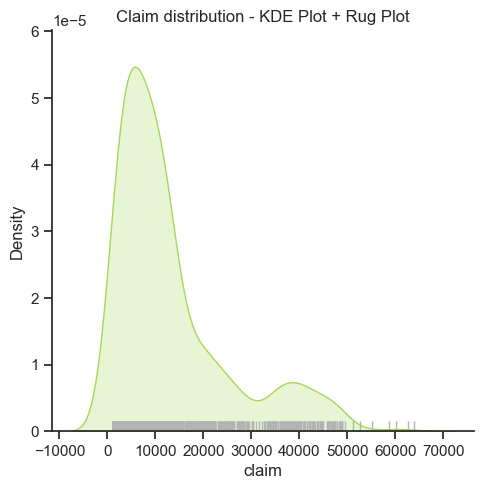

In [31]:
sns.displot(data=df, x='claim', kind='kde', color=sns.color_palette()[4], fill=True).set(title='Claim distribution - KDE Plot + Rug Plot')
sns.rugplot(data=df, x='claim',color=sns.color_palette()[7])

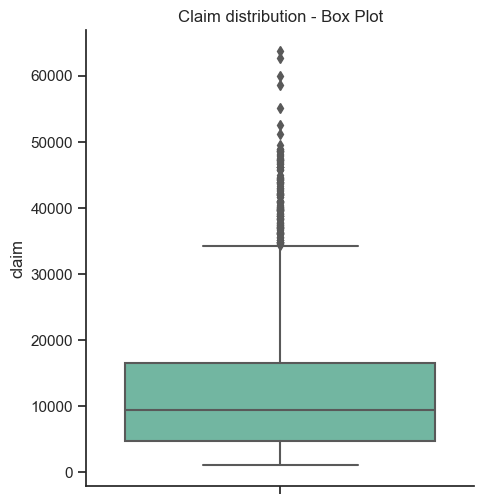

In [32]:
sns.catplot(data=df, y='claim', kind='box').set(title='Claim distribution - Box Plot')

In [33]:
df['claim'].skew()

1.5167468509489237

In [34]:
df['claim'].isnull().sum()

0

**colclusions**
- Right skewed
- Claim amout is generally between 0 - 20,000


## Bivariate Analysis

### Gender and Claim

[Text(0.5, 1.0, 'Gender vs Claim')]

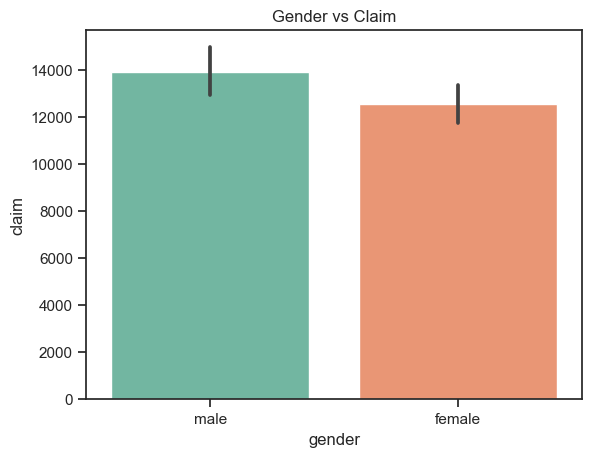

In [35]:
sns.barplot(data=df, x='gender', y='claim').set(title='Gender vs Claim')

[Text(0.5, 1.0, 'Gender vs Claim - Pointplot')]

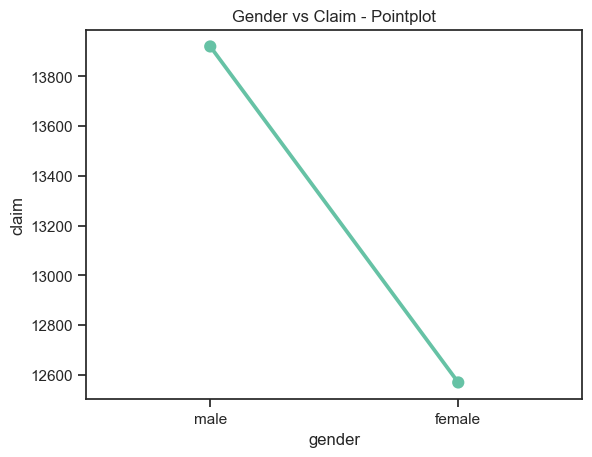

In [36]:
sns.pointplot(data=df, x='gender', y='claim', errorbar=None).set(title='Gender vs Claim - Pointplot')


**Men have more claims than women**

### Claim and Diabetic 

[Text(0.5, 1.0, 'Diabetic vs Claim')]

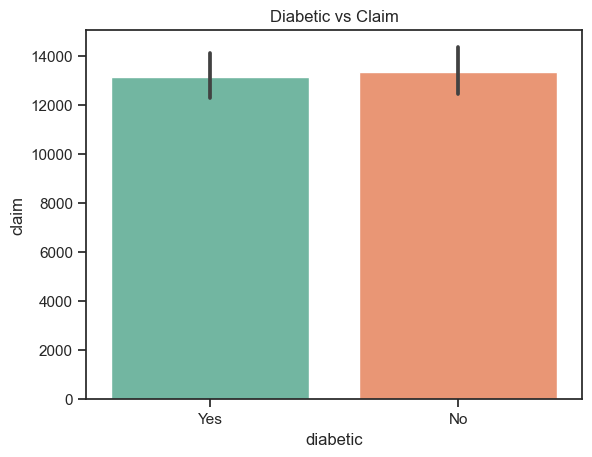

In [37]:
sns.barplot(data=df, x='diabetic', y='claim').set(title='Diabetic vs Claim')

[Text(0.5, 1.0, 'Diabetic vs Claim - Pointplot')]

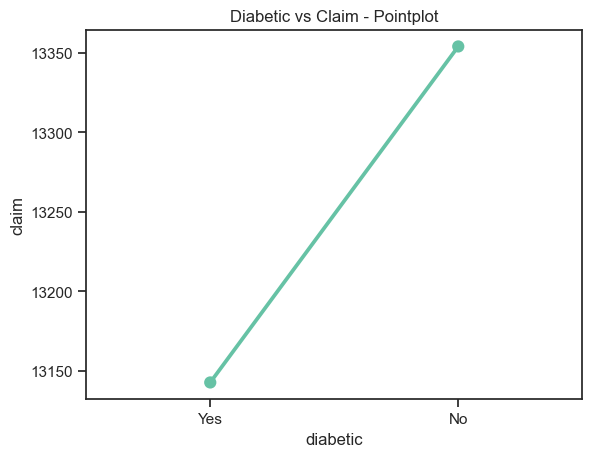

In [38]:
sns.pointplot(data=df, x='diabetic', y='claim', errorbar=None).set(title='Diabetic vs Claim - Pointplot')

**Non - Diabetic people have more claims than non diabetic people**

### Claim and Smoker

[Text(0.5, 1.0, 'Smoker vs Claim')]

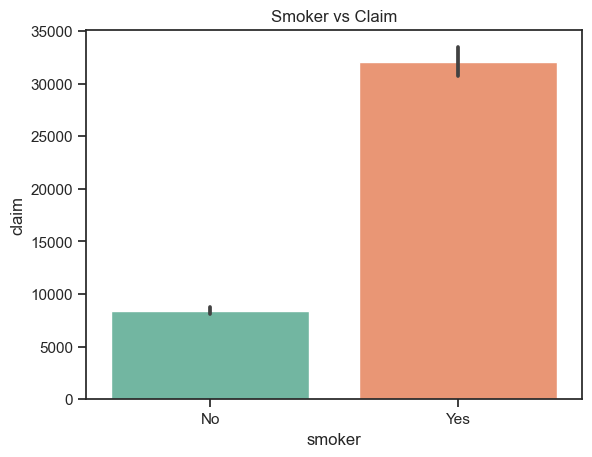

In [39]:
sns.barplot(data=df, x='smoker', y='claim').set(title='Smoker vs Claim')

[Text(0.5, 1.0, 'Smoker vs Claim - Pointplot')]

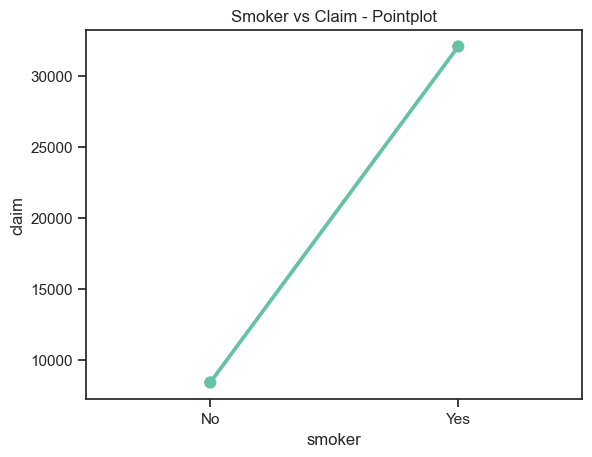

In [40]:
sns.pointplot(data=df, x='smoker', y='claim', errorbar=None).set(title='Smoker vs Claim - Pointplot')

**Smokers have more claim than non smokers**

### Claim and Region


[Text(0.5, 1.0, 'Region vs Claim')]

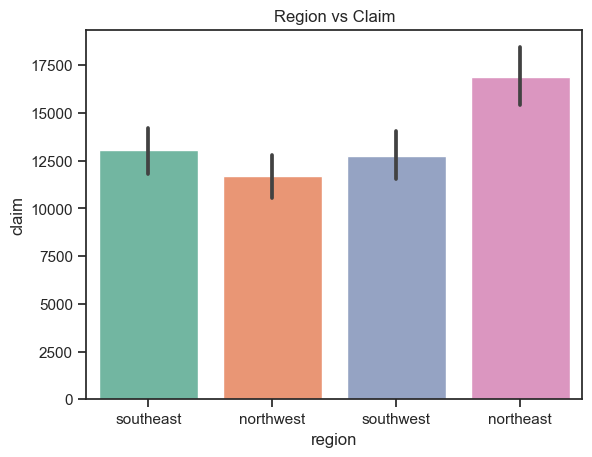

In [41]:
sns.barplot(data=df, x='region', y='claim').set(title='Region vs Claim')

[Text(0.5, 1.0, 'Region vs Claim - Pointplot')]

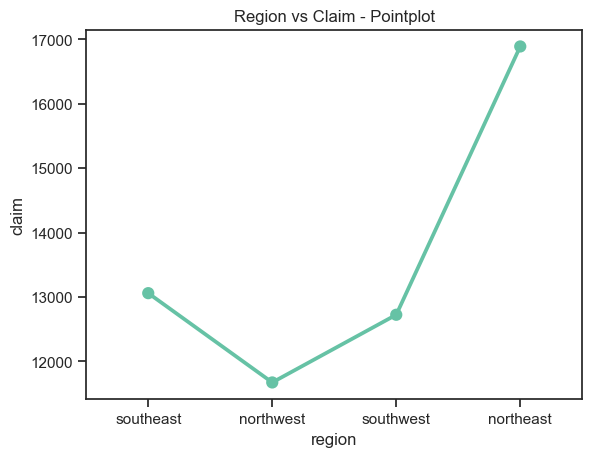

In [42]:
sns.pointplot(data=df, x='region', y='claim', errorbar=None).set(title='Region vs Claim - Pointplot')

NorthEast has the most number of claims.
- This might indicate the more number of smokers are living in the NE region 
- NE might have more men than women

lets check our assumptions

In [43]:
pd.crosstab(df['smoker'], df['region'], normalize='columns')

region,northeast,northwest,southeast,southwest
smoker,,,,
No,0.709957,0.833811,0.794582,0.815287
Yes,0.290043,0.166189,0.205418,0.184713


**As you can see that most non smokers are living in the NE region, which confirms our assumption**

## Multivariate Analysis

### BloodPressure and Gender on Claim

In [44]:
import matplotlib.pyplot as plt

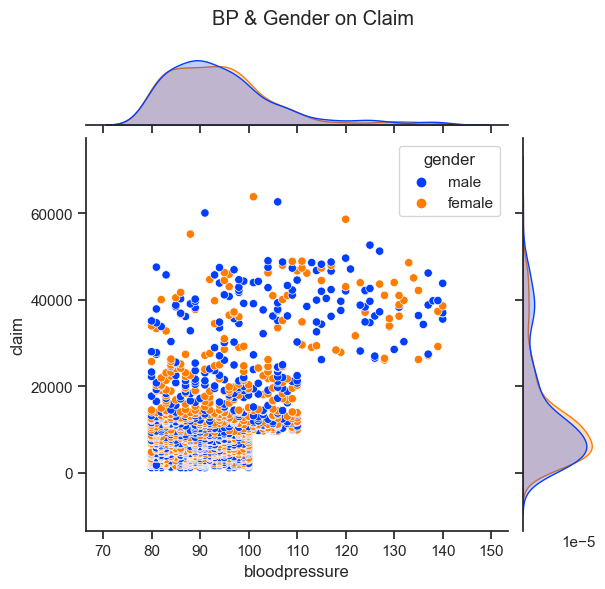

In [45]:
sns.jointplot(data=df,x='bloodpressure',y='claim',kind='scatter',hue='gender', palette='bright')
plt.suptitle('BP & Gender on Claim')
plt.subplots_adjust(top=0.90)

**The plot reveals that there is some correlation between claim value and bloodpressure, in both male & female groups**

### Age, gender on claim

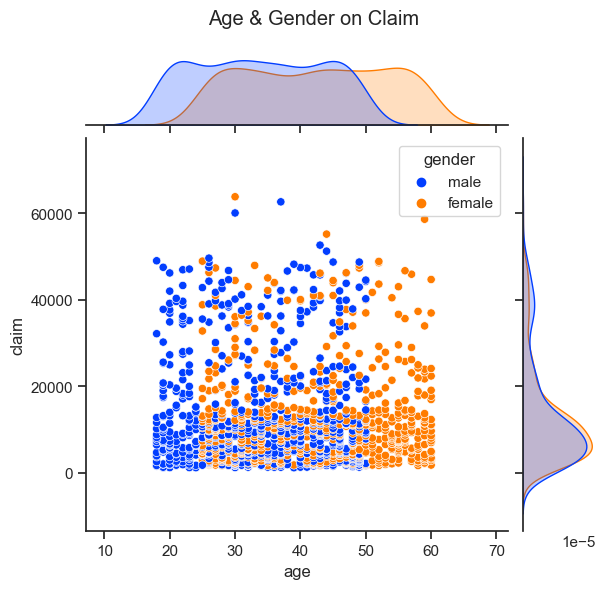

In [46]:
sns.jointplot(data=df,x='age',y='claim',kind='scatter',hue='gender', palette='bright')
plt.suptitle('Age & Gender on Claim')
plt.subplots_adjust(top=0.90)

**Nothing significant can be observed from this**

### Age and Diabetes on claim 

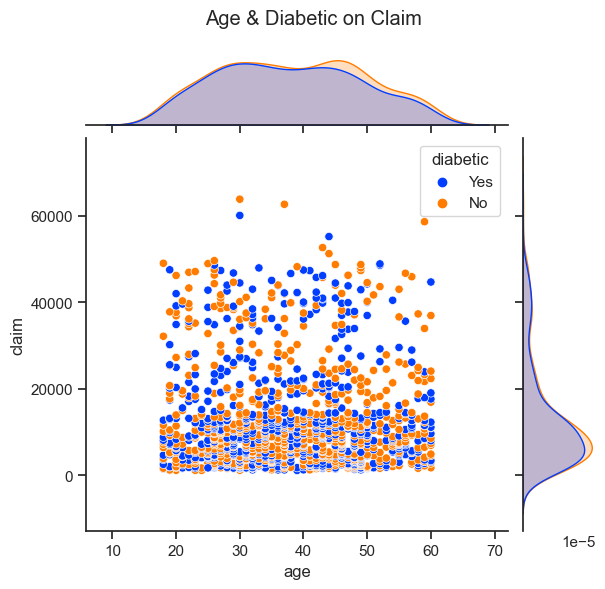

In [47]:
sns.jointplot(data=df,x='age',y='claim',kind='scatter',hue='diabetic', palette='bright')
plt.suptitle('Age & Diabetic on Claim')
plt.subplots_adjust(top=0.90)

**Nothing significant can be observed**

### Age and smoker on claim 

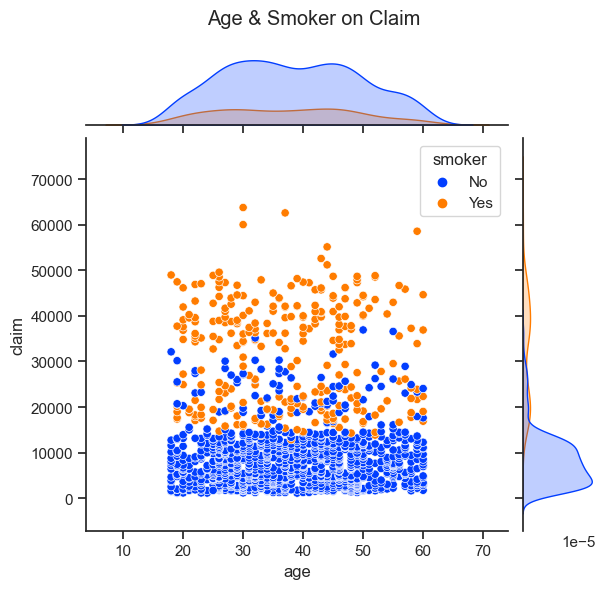

In [48]:
sns.jointplot(data=df,x='age',y='claim',kind='scatter',hue='smoker', palette='bright')
plt.suptitle('Age & Smoker on Claim')
plt.subplots_adjust(top=0.90)

**This plot shows that smoker have a high claim value**

### End of EDA

If you have any suggestions, please do drop it in the comments 